Kress and Carmichael Iron Ratio calculation

[5.78712990e-17 2.30198345e-16 8.63748512e-16 3.06831402e-15
 1.03536137e-14 3.32889426e-14 1.02271700e-13 3.01019965e-13
 8.50884656e-13 2.31502180e-12 6.07506891e-12 1.54062660e-11
 3.78245007e-11 9.00543147e-11 2.08241884e-10 4.68376997e-10
 1.02607062e-09 2.19212567e-09 4.57274945e-09 9.32391068e-09
 1.86029886e-08 3.63545596e-08 6.96512225e-08 1.30939539e-07
 2.41736202e-07 4.38609130e-07]


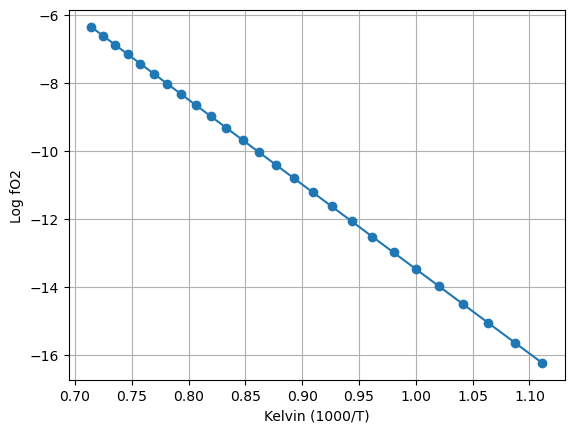

In [60]:
#Oxygen Buffer Reactions
#Cite: B.Fegley, Practical Chemical Thermodynamics for Geoscientists
import numpy as np
import matplotlib.pyplot as plt

#in Bars, at 2000 bars
#at temperature 1273.15K(equal to 1000C)
#using QFM+3 line -- SiO2, Fe2SiO4, Fe3O4 - Quartz, Fayallite, Magnetite

#Existing parameters for QFM
A = 5.5976 
B = 24505.0
C = 0.8099
D = 0.0937
T = np.linspace(900,1400,26)
P = 1

#Specific for the given samples
QFM_PlusThree = 3

Log_fO2 = A - (B/T) + C*np.log10(T) + ((D*(P-1))/T) + QFM_PlusThree
fO2 = 10 ** Log_fO2
print(fO2) #where the array is dependent on the Temperature distribution
plt.plot(1000/np.array(T), Log_fO2, marker = 'o', linestyle = '-')
plt.grid(True)
plt.ylabel("Log fO2")
plt.xlabel("Kelvin (1000/T)")
plt.show()

In [61]:
#K&C p.87 at table 7 Eq.7

In [62]:
#Calculation of the Iron Ratio in the Rock
#using QFM+3 line -- SiO2, Fe2SiO4, Fe3O4 - Quartz, Fayallite, Magnetite
#Kress and Carmichael 1991, Equation 7 and Parameter Values Table 7

#Parameters
a = 0.196
b = 1.1492 * np.power(10, 4)
c = -6.675
d_Al2O3 = -2.243
d_FeOtot = -1.828
d_CaO = 3.201
d_Na2O = 5.854
d_K2O = 6.215
e = -3.36
f = -7.01 * np.power(10.0, -7)
g =1.54 * np.power(10.0, -10)
h = 3.85 * np.power(10.0, -17)
T_0 = 1673 

Al2O3 0.09345960835227536 FeO 0.0678969053009183 CaO 0.09448745508895497 Na2O 0.036610883734761616 K2O 0.004871094326719195


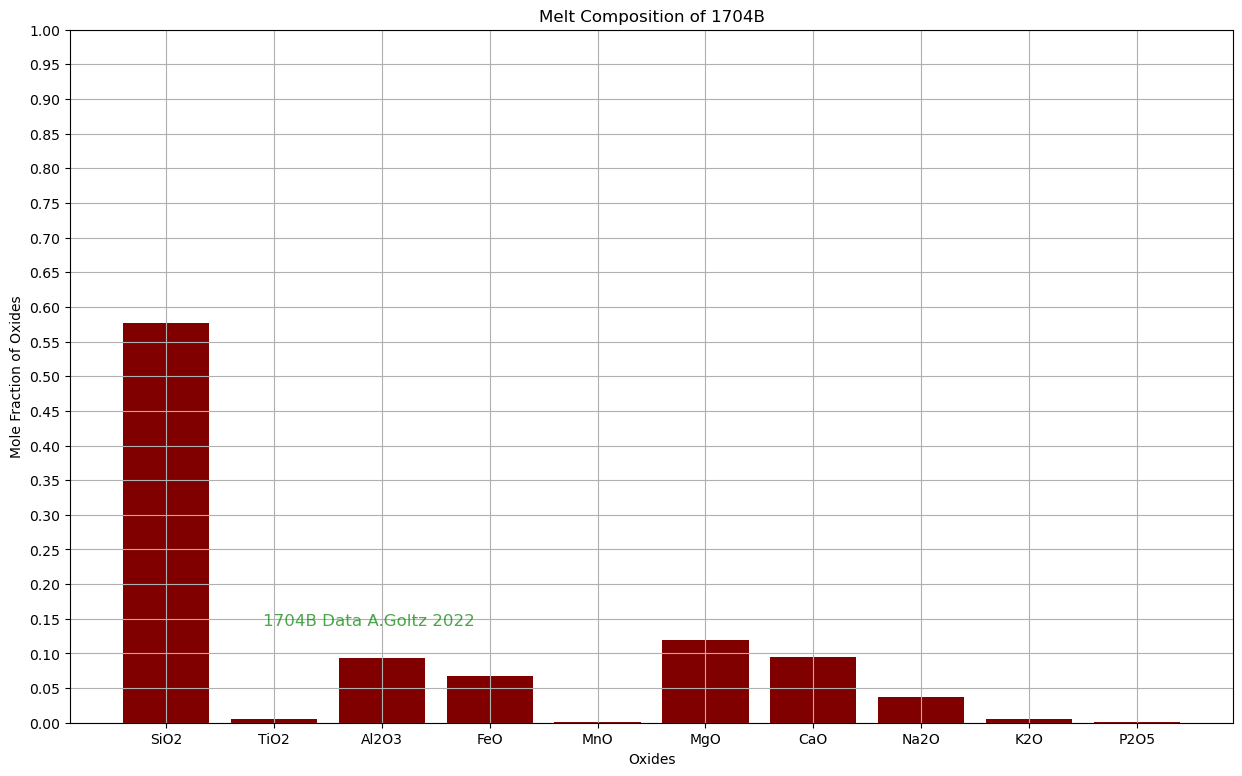

In [63]:
weight_percent_to_moles = lambda weight_percent, molecular_weight: weight_percent / molecular_weight

molecular_weights = {
    'SiO2': 60.082,
    'TiO2': 79.866,
    'Al2O3': 101.96,
    'FeO': 71.84,
    'MnO': 70.9374,
    'MgO': 40.3044,
    'CaO': 56.08,
    'Na2O': 61.98,
    'K2O': 94.20,
    'P2O5': 283.889
}

weight_percents = {
    'SiO2': 55.08,
    'TiO2' : 0.72,
    'Al2O3': 15.16,
    'FeO': 7.76,
    'MnO': 0.16,
    'MgO': 7.63,
    'CaO': 8.43,
    'Na2O': 3.61,
    'K2O': 0.73,
    'P2O5': 0.16
}

moles = {key: weight_percent_to_moles(weight_percents[key], molecular_weights[key]) for key in weight_percents}
total_moles = sum(moles.values())
mole_fractions = {key: moles[key] / total_moles for key in moles}

SUM_dx = (mole_fractions['Al2O3'] * d_Al2O3) + (mole_fractions['FeO'] * d_FeOtot) + (mole_fractions['CaO'] * d_CaO) + (mole_fractions['Na2O'] * d_Na2O) + (mole_fractions['K2O'] * d_K2O)

components = list(mole_fractions.keys())
values = list(mole_fractions.values())

print(f"Al2O3 {mole_fractions['Al2O3']}", f"FeO {mole_fractions['FeO']}", f"CaO {mole_fractions['CaO']}", f"Na2O {mole_fractions['Na2O']}", f"K2O {mole_fractions['K2O']}")
plt.figure(figsize= (15, 9))
plt.bar(components, values, color='maroon')
plt.xlabel("Oxides")
plt.ylabel("Mole Fraction of Oxides")
plt.title("Melt Composition of 1704B")
plt.text(0.9, 0.14, '1704B Data A.Goltz 2022', fontsize = 12, color='g', alpha = 0.7)
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.grid(True)
plt.show()

In [64]:
#Kress and Carmichael 1991 Equation 7

ln_IronRatio = a*np.log(fO2) + np.divide(b, T) + c + SUM_dx + e*(1 - np.divide(T_0, T) - np.log(np.divide(T, T_0))) + f*np.divide(P, T) + g*np.divide((P*T - P*T_0), T) + h*np.divide(P**2,T)

[0.69142369 0.68951939 0.68793353 0.68677437 0.68611439 0.68600053
 0.68646153 0.68751328 0.6891626  0.69141002 0.69425184 0.69768153
 0.70169084 0.70627054 0.71141097 0.71710243 0.72333546 0.73010101
 0.73739061 0.7451964  0.75351119 0.7623285  0.77164255 0.78144826
 0.79174121 0.80251765]


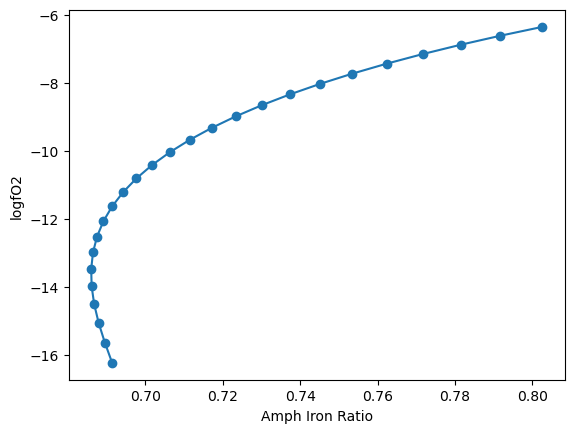

In [65]:
IronRatio = np.exp(ln_IronRatio)
K_Iron = np.linspace(0.86,2.33,26)

#Goltz K value range table 3, equation p.2089 where it is 3+/2+
Amph_IronRatio = K_Iron * IronRatio
plt.plot(Amph_IronRatio, Log_fO2, marker = 'o')
plt.xlabel("Amph Iron Ratio")
plt.ylabel("logfO2")
print(Amph_IronRatio)

code to get the ratio of ferrous to ferric iron is solved for. now we need to take that ratio and apply it to the epma data to determine how much of the iron is ferrous or ferric

In [66]:
import pandas as pd
from fractions import Fraction

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/EPMA RAW DATA.2/Tomas Salazar 7-22-2024 samples.xlsx'
sheet_name = '1704'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()


def Average(Amph_IronRatio):
    return sum(Amph_IronRatio) / len(Amph_IronRatio)

def apply_ratio(whole_number, ratio_numerator, ratio_denominator):
    # calc the number of whole parts for numerator and denominator
    numerator_parts = whole_number * ratio_numerator / ratio_denominator
    denominator_parts = whole_number - numerator_parts
    return int(numerator_parts), int(denominator_parts)

Avg_AmphIronRatio = Average(Amph_IronRatio)
ratio = Fraction(Avg_AmphIronRatio).limit_denominator()
numerator = ratio.numerator
denominator = ratio.denominator
FeOtot_Data = data['FeO']

def apply_ratio_to_data(data, numerator, denominator):
    numerator_part = data * numerator / denominator
    denominator_part = data - numerator_part
    return numerator_part, denominator_part

Anumerator_parts, Adenominator_parts = apply_ratio_to_data(FeOtot_Data, numerator, denominator)



In [67]:
import pandas as pd
from fractions import Fraction

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/EPMA RAW DATA.2/Tomas Salazar 7-22-2024 samples.xlsx'
sheet_name = '7550'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()


def Average(Amph_IronRatio):
    return sum(Amph_IronRatio) / len(Amph_IronRatio)

def apply_ratio(whole_number, ratio_numerator, ratio_denominator):
    # calc the number of whole parts for numerator and denominator
    numerator_parts = whole_number * ratio_numerator / ratio_denominator
    denominator_parts = whole_number - numerator_parts
    return int(numerator_parts), int(denominator_parts)

Avg_AmphIronRatio = Average(Amph_IronRatio)
ratio = Fraction(Avg_AmphIronRatio).limit_denominator()
numerator = ratio.numerator
denominator = ratio.denominator
FeOtot_Data = data['FeO']

def apply_ratio_to_data(data, numerator, denominator):
    numerator_part = data * numerator / denominator
    denominator_part = data - numerator_part
    return numerator_part, denominator_part

Bnumerator_parts, Bdenominator_parts = apply_ratio_to_data(FeOtot_Data, numerator, denominator)


In [68]:
import pandas as pd
from fractions import Fraction

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/EPMA RAW DATA.2/Tomas Salazar 7-22-2024 samples.xlsx'
sheet_name = '1707'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()


def Average(Amph_IronRatio):
    return sum(Amph_IronRatio) / len(Amph_IronRatio)

def apply_ratio(whole_number, ratio_numerator, ratio_denominator):
    # calc the number of whole parts for numerator and denominator
    numerator_parts = whole_number * ratio_numerator / ratio_denominator
    denominator_parts = whole_number - numerator_parts
    return int(numerator_parts), int(denominator_parts)

Avg_AmphIronRatio = Average(Amph_IronRatio)
ratio = Fraction(Avg_AmphIronRatio).limit_denominator()
numerator = ratio.numerator
denominator = ratio.denominator
FeOtot_Data = data['FeO']

def apply_ratio_to_data(data, numerator, denominator):
    numerator_part = data * numerator / denominator
    denominator_part = data - numerator_part
    return numerator_part, denominator_part

Cnumerator_parts, Cdenominator_parts = apply_ratio_to_data(FeOtot_Data, numerator, denominator)


In [69]:
import pandas as pd
from fractions import Fraction

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/EPMA RAW DATA.2/Tomas Salazar 7-22-2024 samples.xlsx'
sheet_name = '1717B1'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()


#average of the iron amphibole ratio
def Average(Amph_IronRatio):
    return sum(Amph_IronRatio) / len(Amph_IronRatio)

def apply_ratio(whole_number, ratio_numerator, ratio_denominator):
    # calc the number of whole parts for numerator and denominator
    numerator_parts = whole_number * ratio_numerator / ratio_denominator
    denominator_parts = whole_number - numerator_parts
    return int(numerator_parts), int(denominator_parts)

Avg_AmphIronRatio = Average(Amph_IronRatio)
ratio = Fraction(Avg_AmphIronRatio).limit_denominator()
numerator = ratio.numerator
denominator = ratio.denominator
FeOtot_Data = data['FeO']

def apply_ratio_to_data(data, numerator, denominator):
    numerator_part = data * numerator / denominator
    denominator_part = data - numerator_part
    return numerator_part, denominator_part

Dnumerator_parts, Ddenominator_parts = apply_ratio_to_data(FeOtot_Data, numerator, denominator)


Xiaoyan Li, Chao Zhang, Harald Behrens, Francois Holtz 

speadsheet calculation from machine learning, written as SS

In [70]:
file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.2 Analyses/Misc/amphsitelocator.xlsx'
sheet_name = 'AMPH-SITE-LOCATOR'

try:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
except Exception as e:
    print(f"Error reading the Excel file: {e}")
    raise

data.columns = data.columns.str.strip()
#because the column names cannot be named, the column numbers will be use and the names of them are 'Unnamed: #'
datafeocalc = data['Unnamed: 26'].iloc[1:27]
datafe2O3calc = data['Unnamed: 25'].iloc[1:27]



Now find a reasonable ratio for the amphibole to match the machine learning spreadsheet

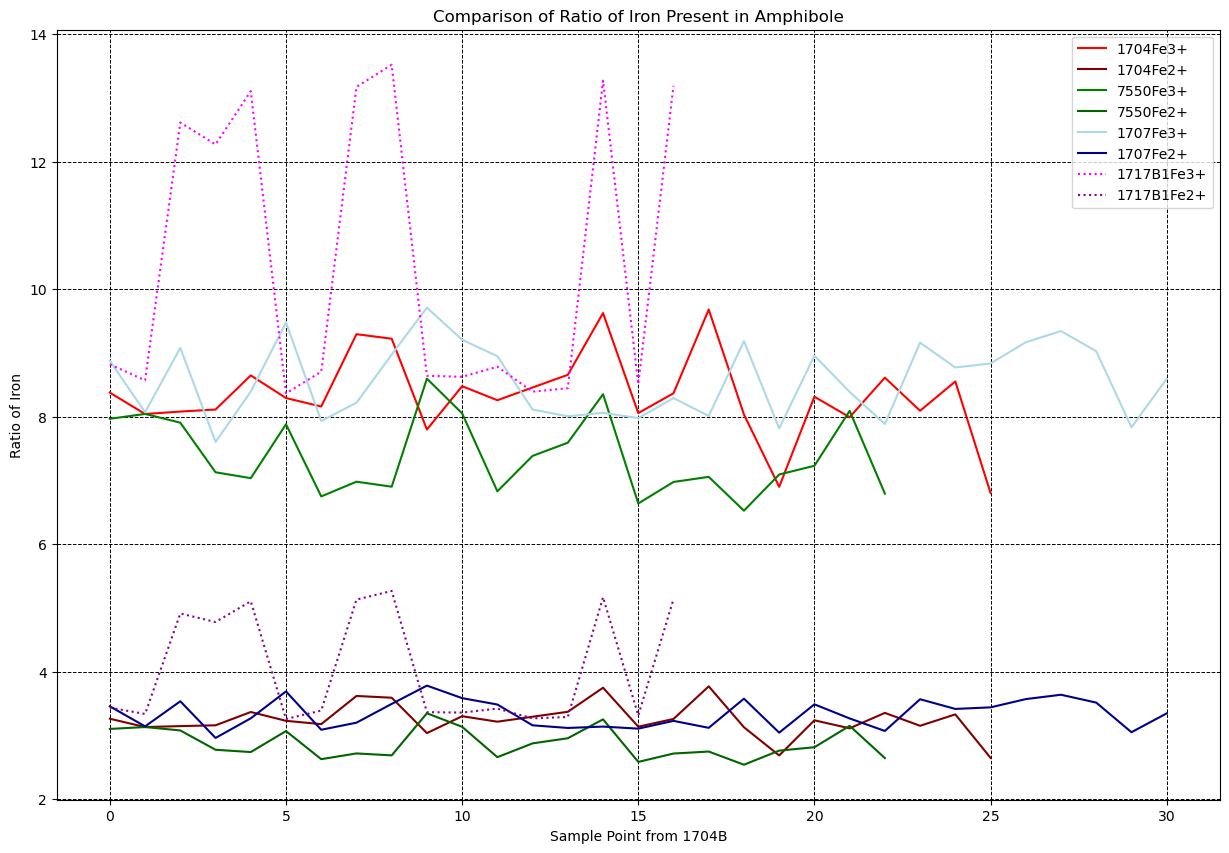

In [71]:
plt.figure(figsize = (15,10))


plt.plot(Anumerator_parts, color = 'red', label = "1704Fe3+")
plt.plot(Adenominator_parts, c = 'maroon', label = "1704Fe2+")
plt.plot(Bnumerator_parts, color = 'green', label = "7550Fe3+")
plt.plot(Bdenominator_parts, c = 'darkgreen', label = "7550Fe2+")
plt.plot(Cnumerator_parts, color = 'lightblue', label = "1707Fe3+")
plt.plot(Cdenominator_parts, c = 'darkblue', label = "1707Fe2+")
plt.plot(Dnumerator_parts, color = 'magenta', label = "1717B1Fe3+", ls = ':')
plt.plot(Ddenominator_parts, c = 'darkmagenta', label = "1717B1Fe2+", ls = ':')



plt.legend()

plt.xlabel("Sample Point from 1704B")
plt.ylabel("Ratio of Iron")
plt.title("Comparison of Ratio of Iron Present in Amphibole")

plt.grid(c = 'black', ls = '--', linewidth = 0.7)
plt.show()


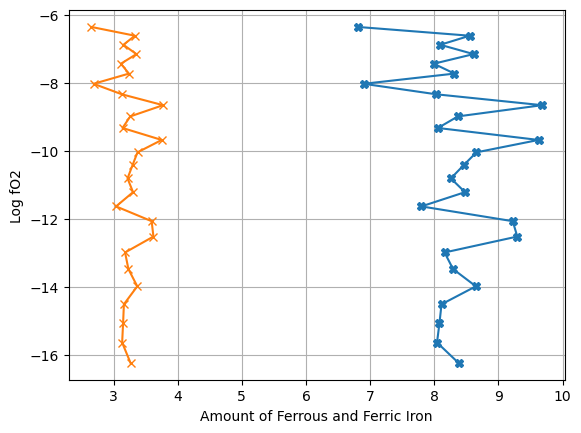

In [73]:
ferrous_avg = np.average(Anumerator_parts)
ferric_avg = np.average(Adenominator_parts)
LogFO2_avg = np.average(Log_fO2)

plt.plot(Anumerator_parts, Log_fO2, marker = 'X')
plt.plot(Adenominator_parts, Log_fO2, marker = 'x')

plt.plot(ferrous_avg, LogFO2_avg, c = 'gray', ls = ':')
plt.plot(ferric_avg, LogFO2_avg, c = 'gray', ls = ':')

plt.ylabel("Log fO2")
plt.xlabel("Amount of Ferrous and Ferric Iron")
plt.grid(True)
plt.show()

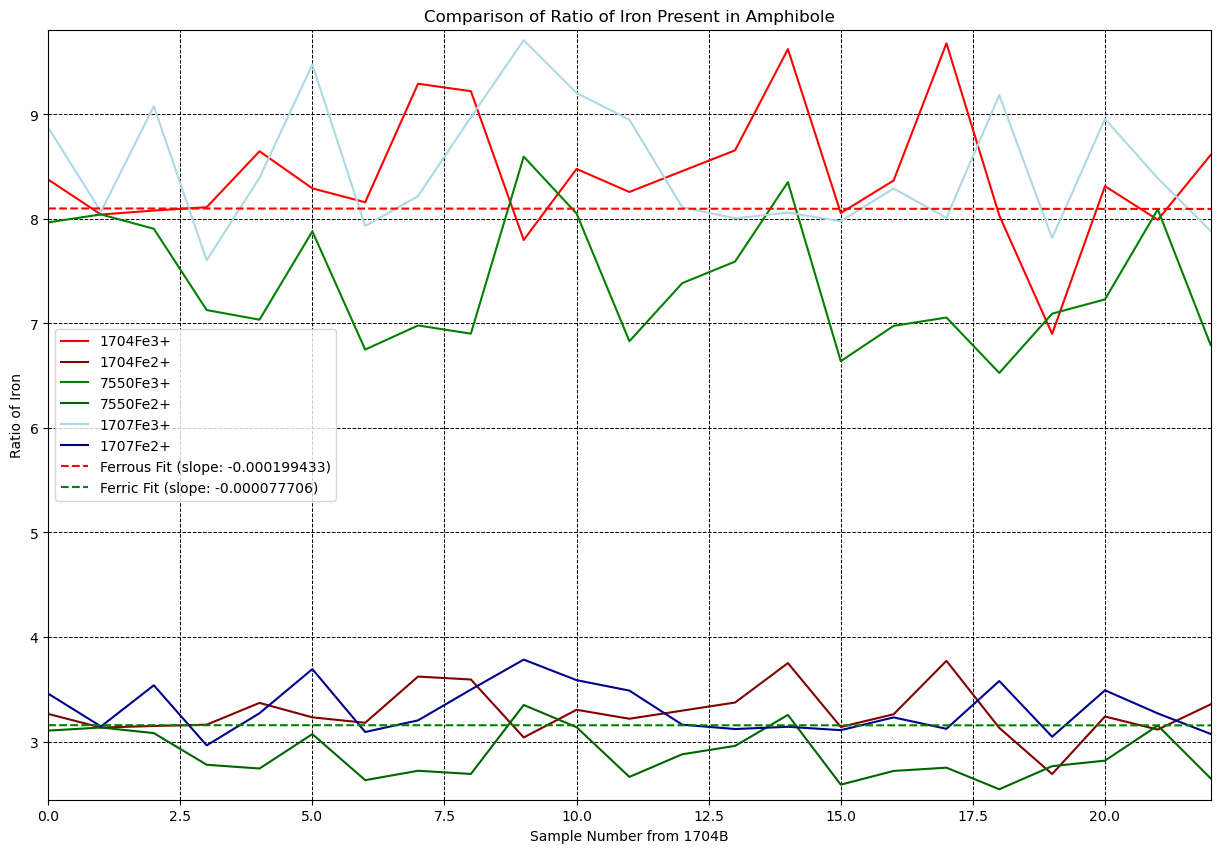

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def fit_and_return_line(x, y):
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    slope = model.coef_[0]
    return y_pred, slope

def align_length(*arrays):
    min_length = min(len(arr) for arr in arrays)
    return [arr[:min_length] for arr in arrays]

aligned_data = align_length(Anumerator_parts, Adenominator_parts, Bnumerator_parts, Bdenominator_parts, Cnumerator_parts, Cdenominator_parts)
Anumerator_parts, Adenominator_parts, Bnumerator_parts, Bdenominator_parts, Cnumerator_parts, Cdenominator_parts = aligned_data

x_Anumerator = np.arange(len(Anumerator_parts))
x_Bnumerator = np.arange(len(Bnumerator_parts))
x_Cnumerator = np.arange(len(Cnumerator_parts))

Ferrous = np.concatenate((Anumerator_parts, Bnumerator_parts, Cnumerator_parts))
Ferric = np.concatenate((Adenominator_parts, Bdenominator_parts, Cdenominator_parts))

x_Ferrous = np.arange(len(Ferrous))
x_Ferric = np.arange(len(Ferric))

Ferrous_line, slope_A = fit_and_return_line(x_Ferrous, Ferrous)
Ferric_line, slope_B = fit_and_return_line(x_Ferric, Ferric)

plt.figure(figsize=(15, 10))

plt.plot(Anumerator_parts, color='red', label="1704Fe3+")
plt.plot(Adenominator_parts, color='maroon', label="1704Fe2+")
plt.plot(Bnumerator_parts, color='green', label="7550Fe3+")
plt.plot(Bdenominator_parts, color='darkgreen', label="7550Fe2+")
plt.plot(Cnumerator_parts, color='lightblue', label="1707Fe3+")
plt.plot(Cdenominator_parts, color='darkblue', label="1707Fe2+")

plt.plot(x_Ferrous, Ferrous_line, color='red', linestyle='--', label=f"Ferrous Fit (slope: {slope_A:.9f})")
plt.plot(x_Ferric, Ferric_line, color='green', linestyle='--', label=f"Ferric Fit (slope: {slope_B:.9f})")

plt.xlim(0, len(Anumerator_parts) - 1)
plt.ylim(min(Ferrous.min(), Ferric.min()) - 0.1, max(Ferrous.max(), Ferric.max()) + 0.1)

plt.xlabel("Sample Number from 1704B")
plt.ylabel("Ratio of Iron")
plt.title("Comparison of Ratio of Iron Present in Amphibole")
plt.legend()
plt.grid(color='black', linestyle='--', linewidth=0.7)
plt.show()
